In [5]:
# Libraries
import pandas as pd

In [6]:
# Importing recipes data
df = pd.read_csv('D:/Local Disk/Projects/Data_camp/recipe_site_traffic_2212.csv')

# Data Preparation

In [7]:
# structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


The dataset had 947 observations and 8 variables.

There were 5 variables that had some form of missin values, that is; Calories, Carbohydrates, Sugar, Protein, and high_traffic

## Counting the missing values

In [8]:
# Counting the missing values
missing_count = df.isnull().sum()
print(missing_count)

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


In [9]:
# Converting to percentages
missing_percent = (missing_count / len(df)) * 100
print(missing_percent)

recipe           0.000000
calories         5.491024
carbohydrate     5.491024
sugar            5.491024
protein          5.491024
category         0.000000
servings         0.000000
high_traffic    39.387540
dtype: float64


In [10]:
# Organizing into a table
missing_data = pd.DataFrame({'count': missing_count, 'percent': missing_percent})
print(missing_data)

              count    percent
recipe            0   0.000000
calories         52   5.491024
carbohydrate     52   5.491024
sugar            52   5.491024
protein          52   5.491024
category          0   0.000000
servings          0   0.000000
high_traffic    373  39.387540


Since all the variable have missing_value percentage below 50%, I am going to impute them to handle the missingness

### Handling the missing variables

### 1. High_traffic

In [11]:
# Identifying categories
df["high_traffic"].unique()

array(['High', nan], dtype=object)

In [12]:
# Replace the "nan"
df["high_traffic"].fillna("Low", inplace=True)

# Confirming the changes
df["high_traffic"].unique()

C:\Users\ekiru\AppData\Local\Temp\ipykernel_13208\2330145325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["high_traffic"].fillna("Low", inplace=True)


array(['High', 'Low'], dtype=object)

### 2. Calories

In [13]:
# Understanding distribution
df["calories"].describe()

count     895.000000
mean      435.939196
std       453.020997
min         0.140000
25%       110.430000
50%       288.550000
75%       597.650000
max      3633.160000
Name: calories, dtype: float64

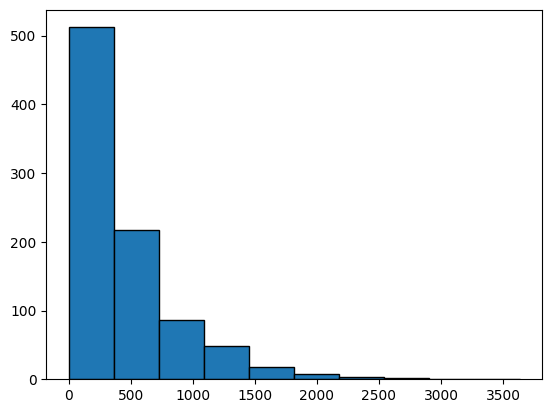

In [14]:
import matplotlib.pyplot as plt

# Plotting the distribution
plt.hist(df["calories"], bins=10, density=False, edgecolor='black')

plt.show()

Since the "calories" data is skewed, the median will be used to impute

In [15]:
# Handling the missing values
median_value = df["calories"].median()
df["calories"].fillna(median_value, inplace=True)

# confirming changes
df["calories"].describe()

C:\Users\ekiru\AppData\Local\Temp\ipykernel_13208\2383131409.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["calories"].fillna(median_value, inplace=True)


count     947.000000
mean      427.846019
std       441.673556
min         0.140000
25%       114.410000
50%       288.550000
75%       576.225000
max      3633.160000
Name: calories, dtype: float64

### 3. Cabohydrates

In [16]:
df["carbohydrate"].describe()

count    895.000000
mean      35.069676
std       43.949032
min        0.030000
25%        8.375000
50%       21.480000
75%       44.965000
max      530.420000
Name: carbohydrate, dtype: float64

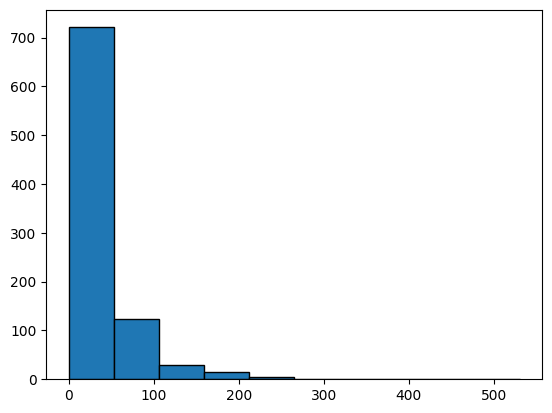

In [17]:
import matplotlib.pyplot as plt

# Plotting the distribution
plt.hist(df["carbohydrate"], bins=10, density=False, edgecolor='black')

plt.show()

The distribution of the Carbohydrates variable is skewed, the missing values will be imputed using the median value

In [18]:
# Imputing using the median
median_value = df["carbohydrate"].median()

df["carbohydrate"].fillna(median_value, inplace=True)

C:\Users\ekiru\AppData\Local\Temp\ipykernel_13208\881798201.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["carbohydrate"].fillna(median_value, inplace=True)


### 4. Sugar

In [19]:
df["sugar"].describe()

count    895.000000
mean       9.046547
std       14.679176
min        0.010000
25%        1.690000
50%        4.550000
75%        9.800000
max      148.750000
Name: sugar, dtype: float64

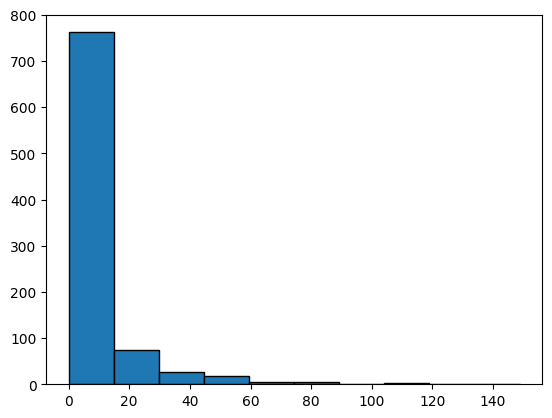

In [20]:
import matplotlib.pyplot as plt

# Plotting the distribution
plt.hist(df["sugar"], bins=10, density=False, edgecolor='black')

plt.show()

Since the distribution of the sugar variable is skewed, the missing values will be imputed using the median value

In [21]:
# Handling the missing values
median_value = df["sugar"].median()
df["sugar"].fillna(median_value, inplace=True)

C:\Users\ekiru\AppData\Local\Temp\ipykernel_13208\3793727808.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sugar"].fillna(median_value, inplace=True)


### 5. Proteins

In [22]:
df["protein"].describe()

count    895.000000
mean      24.149296
std       36.369739
min        0.000000
25%        3.195000
50%       10.800000
75%       30.200000
max      363.360000
Name: protein, dtype: float64

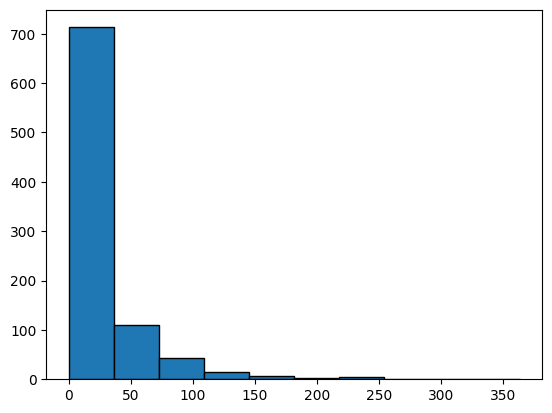

In [23]:
import matplotlib.pyplot as plt

# Plotting the distribution
plt.hist(df["protein"], bins=10, density=False, edgecolor='black')

plt.show()

Since the distribution of the Protein variable is skewed, the missing values will be imputed using the median value

In [24]:
# Handling the missing values
median_value = df["protein"].median()
df["protein"].fillna(median_value, inplace=True)

C:\Users\ekiru\AppData\Local\Temp\ipykernel_13208\1126928724.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["protein"].fillna(median_value, inplace=True)


# Exploratory Data Analysis

### High_calories

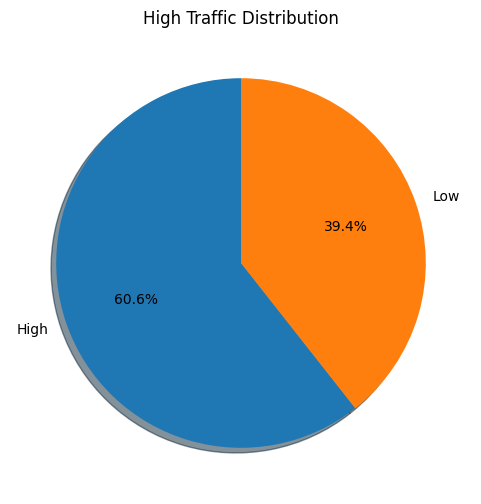

In [25]:
# Pie chart
high_traffic_count = df["high_traffic"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    high_traffic_count,
    labels=high_traffic_count.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.title("High Traffic Distribution")
plt.show()

Most of the sites had high traffic estimating to 60.5%

### Category

In [26]:
df["category"].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [27]:
category_count = df["category"].value_counts()

category_percent = df["category"].value_counts(normalize=True) * 100

category_summary = pd.DataFrame({
    "counts":category_count,
    "percentage":category_percent
})
category_summary

,counts,percentage
category,,
Breakfast,106,11.193242
Chicken Breast,98,10.348469
Beverages,92,9.714889
Lunch/Snacks,89,9.398099
Potato,88,9.292503
Pork,84,8.870116
Vegetable,83,8.764520
Dessert,83,8.764520
Meat,79,8.342133


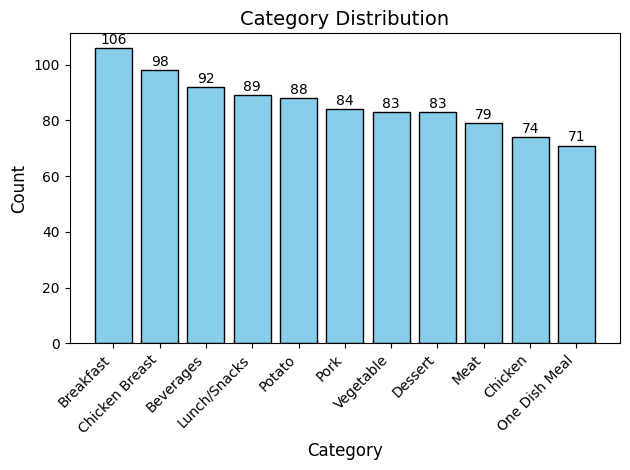

In [28]:
# Bar plot
plt.bar(category_summary.index, category_summary['counts'], color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Category Distribution", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, val in enumerate(category_summary['counts']):
    plt.text(i, val + 0.5, str(val), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

The breatfast type of recipe was the most common with a the highest measure of 106

### Scatter plot

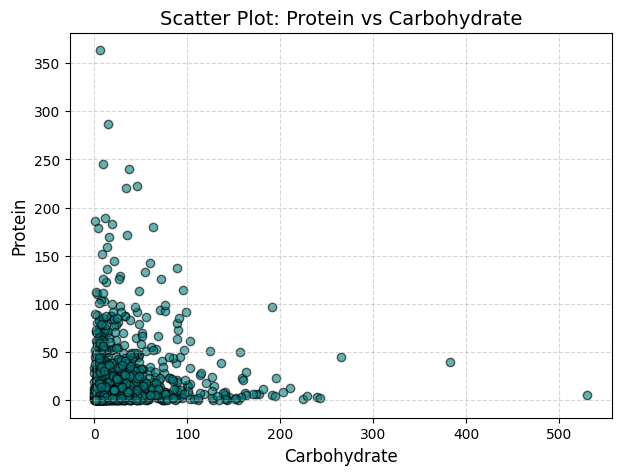

In [29]:
plt.figure(figsize=(7,5))
plt.scatter(df['carbohydrate'], df['protein'], color='teal', alpha=0.6, edgecolor='k')

plt.title("Scatter Plot: Protein vs Carbohydrate", fontsize=14)
plt.xlabel("Carbohydrate", fontsize=12)
plt.ylabel("Protein", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

There was a negative linear relationship between the amount of protein and carbohydrate, that is; if the amount of protein in grams increases the amount of carbohydrates decreases.

# Model Development

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support, roc_auc_score,classification_report, confusion_matrix)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [31]:
df.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

In [32]:
# Generating the X and y dataset
X = df[['calories', 'carbohydrate', 'sugar', 'protein', 'category','servings']]

y = df['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)


In [33]:
# df['servings'].unique()

# Converting to numeric
X['servings'] = pd.to_numeric(X['servings'], errors='coerce')

median_value = X["servings"].median()
X["servings"].fillna(median_value, inplace=True)

C:\Users\ekiru\AppData\Local\Temp\ipykernel_13208\3716166174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['servings'] = pd.to_numeric(X['servings'], errors='coerce')
C:\Users\ekiru\AppData\Local\Temp\ipykernel_13208\3716166174.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  

In [34]:
# Categorizing features
numeric_features = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
categorical_features = ['category']

# Preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target distribution in train set:")
print(y_train.value_counts(normalize=True))

Train shape: (757, 6)
Test shape: (190, 6)
Target distribution in train set:
high_traffic
1    0.606341
0    0.393659
Name: proportion, dtype: float64


The data was split using the 80/20 ratio. The training dataset had 757 observations while the testing dataset had 190 observations

### **Running a Logistic Regression Model**

In [36]:
# Checking if there exist any missing values
X.isnull().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
dtype: int64

In [37]:
# Creating a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [45]:
# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred_lr = model.predict(X_test)
y_proba_lr = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Baseline Model Performance (Logistic Regression):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_proba_lr):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Low Traffic', 'High Traffic']))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Baseline Model Performance (Logistic Regression):
Accuracy: 0.774
ROC-AUC:  0.866

Classification Report:
              precision    recall  f1-score   support

 Low Traffic       0.69      0.79      0.73        75
High Traffic       0.85      0.77      0.80       115

    accuracy                           0.77       190
   macro avg       0.77      0.78      0.77       190
weighted avg       0.78      0.77      0.78       190

Confusion Matrix:
[[59 16]
 [27 88]]


The Logistic regression achieved an accuracy of 77.4% and an Arrea under the curve of 86.6%

The Logistic regression model correctly predicted 59 observations as high traffic recipes and wrongly classified 16 as low traffic recipes. Whereas, it correctly classified 88 observations as low traffic recipe and wrongly classified 27 as being high traffic recipes.

### **Fine tuning the Logistic regression**

In [41]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Generating a pipeline with GridSearchCV for hyperparameter tuning
model_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=123))
])

# Defining parameters
param_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# Grid search
grid_lr = GridSearchCV(
    model_1,
    param_grid=param_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fitting the model
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression parameters found: ", grid_lr.best_params_)
print(f"Best ROC-AUC: {grid_lr.best_score_:.3f}")

Best Logistic Regression parameters found:  {'classifier__C': 1, 'classifier__penalty': 'l2'}


In [47]:
# making predictions with the tuned model
y_pred_tuned = grid_lr.predict(X_test)
y_proba_tuned = grid_lr.predict_proba(X_test)[:, 1]

# Evaluation the tuned model
print("Baseline Model Performance (Logistic Regression):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.3f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_proba_tuned):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=['Low Traffic', 'High Traffic']))

Baseline Model Performance (Logistic Regression):
Accuracy: 0.774
ROC-AUC:  0.866

Classification Report:
              precision    recall  f1-score   support

 Low Traffic       0.69      0.79      0.73        75
High Traffic       0.85      0.77      0.80       115

    accuracy                           0.77       190
   macro avg       0.77      0.78      0.77       190
weighted avg       0.78      0.77      0.78       190



After fine tuning, there was no change in the performance of the Logistic regression model. The model achieved an accuracy of 77.4% and an Arrea under the curve of 86.6%

### **Decision Tree**

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
# Defining pipeline
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fiting the model
dt_model.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]


In [51]:
# Evaluation
print("Baseline Model Performance (Decision Tree):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_proba_dt):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Low Traffic', 'High Traffic']))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Baseline Model Performance (Decision Tree):
Accuracy: 0.642
ROC-AUC:  0.649

Classification Report:
              precision    recall  f1-score   support

 Low Traffic       0.54      0.68      0.60        75
High Traffic       0.75      0.62      0.68       115

    accuracy                           0.64       190
   macro avg       0.64      0.65      0.64       190
weighted avg       0.66      0.64      0.65       190

Confusion Matrix:
[[51 24]
 [44 71]]


The Decision Tree model achieved an accuracy of 64.2% and an Area under the curve of 64.9%

The Decision Tree model managed to correctly classify 51 observations as high traffic recipes and wrongly classified 24 as low traffic recipes. Whereas, it correctly classified 71 observations as low traffic recipe and wrongly classified 44 as being high traffic recipes.

### **Fine tuning the Decision Tree model**

In [53]:
# Defining pipeline
dt_model_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=123))
])

# Defining parameters for tuning
param_tree = {
    'classifier__max_depth': [3, 5, 7, 9, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Grid search
grid_dt = GridSearchCV(dt_model_1, param_tree, cv=5, scoring="roc_auc", n_jobs=-1)

# Fitting the model
grid_dt.fit(X_train, y_train)

print("Best Decision Tree parameters found: ", grid_dt.best_params_)
print(f"Best ROC-AUC: {grid_dt.best_score_:.3f}")

Best Decision Tree parameters found:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
Best ROC-AUC: 0.786


In [54]:
# Making predictions with the tuned model
y_pred_dt_tuned = grid_dt.predict(X_test)
y_proba_dt_tuned = grid_dt.predict_proba(X_test)[:, 1]

# Evaluating the tuned model
print("Model Performance (Decision Tree):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_tuned):.3f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_proba_dt_tuned):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_tuned, target_names=['Low Traffic', 'High Traffic']))

Model Performance (Decision Tree):
Accuracy: 0.758
ROC-AUC:  0.779

Classification Report:
              precision    recall  f1-score   support

 Low Traffic       0.70      0.68      0.69        75
High Traffic       0.79      0.81      0.80       115

    accuracy                           0.76       190
   macro avg       0.75      0.74      0.75       190
weighted avg       0.76      0.76      0.76       190



After fine tuning, the performance of the Decision Tree model improved. The model achieved an accuracy of 75.8% and an Area under the curve of 77.9%

### **Random Forest model**

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Defining pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Training the model
rf_model.fit(X_train, y_train)

# making predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


In [58]:

# Evaluation
print("Baseline Model Performance (Random Forest):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_proba_rf):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Low Traffic', 'High Traffic']))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Baseline Model Performance (Random Forest):
Accuracy: 0.711
ROC-AUC:  0.831

Classification Report:
              precision    recall  f1-score   support

 Low Traffic       0.61      0.72      0.66        75
High Traffic       0.79      0.70      0.75       115

    accuracy                           0.71       190
   macro avg       0.70      0.71      0.70       190
weighted avg       0.72      0.71      0.71       190

Confusion Matrix:
[[54 21]
 [34 81]]


The Random Forest model achieved an accuracy of 71.1% and an Area under the curve of 83.1%

The Random Forest model managed to correctly classify 54 observations as high traffic recipes and wrongly classified 21 as low traffic recipes. Whereas, it correctly classified 81 observations as low traffic recipe and wrongly classified 34 as being high traffic recipes.

### **Fine tuning the Random Forest model**

In [59]:
# Defining pipeline
rf_model_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=123))
])

# Defining parameters
param_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

# Grid search
grid_rf = GridSearchCV(rf_model_1, param_rf, cv=5, scoring="roc_auc", n_jobs=-1)

# Fitting the model
grid_rf.fit(X_train, y_train)

print("Best Random Forest parameters found: ", grid_rf.best_params_)
print(f"Best ROC-AUC: {grid_rf.best_score_:.3f}")

Best Random Forest parameters found:  {'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best ROC-AUC: 0.814


In [72]:
# Making predictions
y_pred_rf_tuned = grid_rf.predict(X_test)
y_proba_rf_tuned = grid_rf.predict_proba(X_test)[:, 1]

# Evaluations
print("Model Performance (Random Forest):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.3f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_proba_rf_tuned):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_tuned, target_names=['Low Traffic', 'High Traffic']))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_tuned))

Model Performance (Random Forest):
Accuracy: 0.779
ROC-AUC:  0.862

Classification Report:
              precision    recall  f1-score   support

 Low Traffic       0.81      0.57      0.67        75
High Traffic       0.77      0.91      0.83       115

    accuracy                           0.78       190
   macro avg       0.79      0.74      0.75       190
weighted avg       0.78      0.78      0.77       190

Confusion Matrix:
[[ 43  32]
 [ 10 105]]


After fine tunning, the performance of the Random Forest model improved. The model achieved an accuracy of 77.9% and an Area under the curve of 86.2%

Precision score (78%), recall score (78%), and f1-score (77%)

# Model Performance

### Performance of the models before fine tuning

In [ ]:
# Comparing model performance
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'ROC_AUC': [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_dt),
        roc_auc_score(y_test, y_proba_rf)
    ]
})

print(model_performance)


                 Model  Accuracy   ROC_AUC
0  Logistic Regression  0.773684  0.866087
1        Decision Tree  0.642105  0.649101
2        Random Forest  0.710526  0.831478


### Performance of the models after fine tuning

In [62]:
# Comparing model performance
model_performance_finetuned = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_tuned),
        accuracy_score(y_test, y_pred_dt_tuned),
        accuracy_score(y_test, y_pred_rf_tuned)
    ],
    'ROC_AUC': [
        roc_auc_score(y_test, y_proba_tuned),
        roc_auc_score(y_test, y_proba_dt_tuned),
        roc_auc_score(y_test, y_proba_rf_tuned)
    ]
})

print(model_performance)

                 Model  Accuracy   ROC_AUC
0  Logistic Regression  0.773684  0.866087
1        Decision Tree  0.757895  0.778841
2        Random Forest  0.778947  0.862261


The Logistic Regression (Accuracy=77%, AUC=87%) and the Random Forest model (Accuracy=78%, AUC=86%) performed best

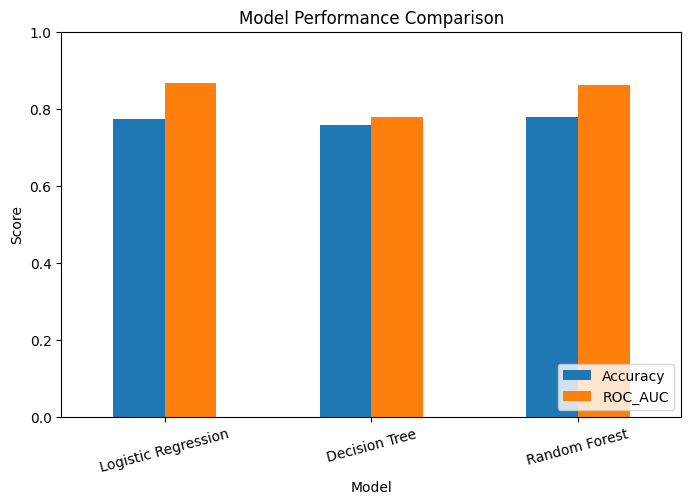

In [63]:
# Plotting performance comparison
model_performance_finetuned.plot(x='Model', y=['Accuracy', 'ROC_AUC'], kind='bar', figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.show()


Therefore, according to the above  graph, the Logistic Regression model and the Random Forest model were the best performing models in predicting recipe popularity. However, focusing on thte Accuracy score, the Random Forest model was selected.

In [65]:
# Get the preprocessor and trained model from the tuned pipeline
best_rf_model = grid_rf.best_estimator_

# Extract feature names from the ColumnTransformer
num_features = numeric_features
cat_features = list(best_rf_model.named_steps['preprocessor']
                    .transformers_[1][1]
                    .get_feature_names_out(categorical_features))

all_features = num_features + cat_features

# Extract feature importance values
importances = best_rf_model.named_steps['classifier'].feature_importances_

# Combine into a DataFrame
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)


,Feature,Importance
5,category_Beverages,0.260497
6,category_Breakfast,0.117431
3,protein,0.115994
15,category_Vegetable,0.108391
14,category_Potato,0.090406
0,calories,0.069647
1,carbohydrate,0.053441
2,sugar,0.050716
13,category_Pork,0.048942
7,category_Chicken,0.029036


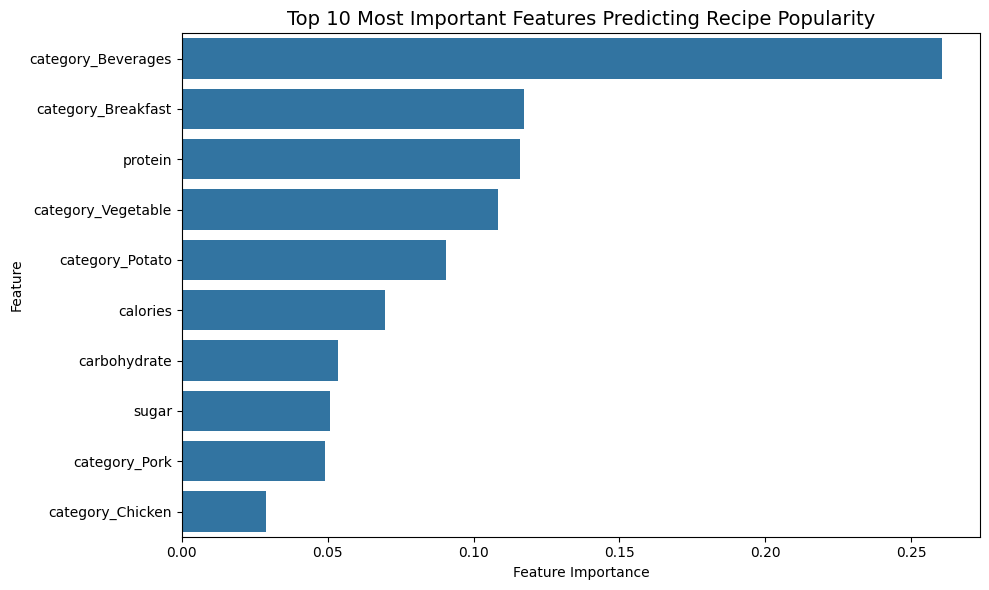

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    data=feature_importance.head(10),
    x='Importance',
    y='Feature'
)
plt.title("Top 10 Most Important Features Predicting Recipe Popularity", fontsize=14)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


The above graph show the top 10 most influencial variables in predicting recipe popularity

## **How the Business Should Monitor What They Want to Achieve**

To effectively monitor progress toward predicting and prioritizing popular recipes, the business should establish a continuous performance monitoring framework that integrates data analytics, key performance indicators (KPIs), and periodic model evaluation.

This ensures that the system not only performs well technically but also aligns with broader business goals such as higher user engagement, content relevance, and traffic growth.

## **Estimate the initial value(s) for the metric based on the current data?**

Using the tuned Random Forest model, which was selected as the best performed among all tested algorithms, we evaluated how accurately it can predict recipe popularity (high traffic).

The model was assessed on unseen test data (20% of total dataset) using precision, recall, F1-score, and ROC-AUC. This all aligned with the business goal of identifying and prioritizing popular recipes.

Accuracy score (78%), Precision score (78%), recall score (78%), f1-score (77%), and AUC (86%)

#### **Precision score (78%)**
This means that 78% of predicted popular recipes were actually high-traffic recipe, equivalent to roughly 4 out of 5. Therefore, approximately 4 out of every 5 recipes predicted as popular by the model are indeed high-traffic recipes. This nearly meets the business’s short-term goal of achieving around 80% accuracy, but there is room to improve to the precision target.


## **Summary of Findings**

This project aimed to develop a predictive model that identifies recipes likely to attract high web traffic (popular recipes).
Using a dataset of 947 recipes with variables such as calories, carbohydrates, sugar, protein, servings, and category, several machine learning models were tested.

After evaluation, the Random Forest Classifier delivered the best performance with the following metrics on the test data: Accuracy score (78%), Precision score (78%), recall score (78%), f1-score (77%), and AUC (86%)

These results indicate that the model can correctly identify most high-traffic recipes (high recall) while maintaining a fairly strong precision — meaning most recipes predicted as popular are indeed popular.

The Recipe Popularity Precision (RPP) metric, which the business should monitor, currently stands at 78%, close to the 80% target set by the product team.

## **Recommendations**

#### 1. Monitor Key Metric — RPP (Recipe Popularity Precision):

Continuously track this precision metric as the primary business KPI, and set an initial baseline of 78% and target incremental improvements above 80% through model refinement.

#### 2. Model Improvement and Threshold Optimization:

Adjust the model’s classification threshold to balance precision and recall better, possibly improving RPP without major retraining. Experiment with more advanced tuning (e.g., feature engineering, grid/random search, or ensemble averaging).

#### 3. Feature Enhancement:

Collect additional features such as user engagement metrics (time on page, likes, saves, or shares) and recipe complexity indicators (number of ingredients, preparation time) to strengthen the model’s predictive power.

#### 4. Category-Specific Insights:

Examine recipe categories contributing most to false positives (unpopular recipes predicted as popular) to identify potential optimization opportunities in content presentation or marketing.

#### 5. Continuous Model Retraining:

Retrain the model periodically to capture evolving user preferences and seasonal recipe trends.